In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GMM
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
csv_data = pd.read_csv("iBeacon_RSSI_Unlabeled.csv")

In [4]:
X = csv_data.iloc[:, 2:]

In [5]:
X

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200
5,-200,-200,-200,-200,-81,-62,-200,-200,-200,-200,-200,-200,-200
6,-200,-200,-200,-200,-81,-61,-200,-200,-200,-200,-200,-200,-200
7,-200,-200,-200,-200,-81,-58,-200,-200,-200,-200,-200,-200,-200
8,-200,-200,-200,-200,-80,-58,-200,-200,-200,-200,-200,-200,-200
9,-200,-200,-200,-200,-80,-59,-76,-200,-200,-200,-200,-200,-200


In [6]:
# kmeans算法
kmeans = KMeans(n_clusters=3, random_state=9).fit(X)

In [7]:
result_KMeans = kmeans.labels_

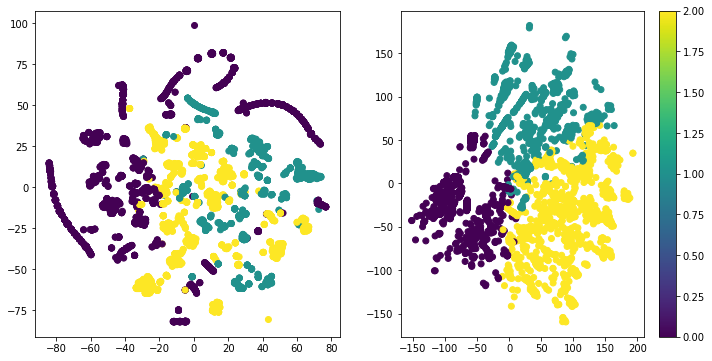

In [8]:
# 使用TSNE进行降维处理
tsne = TSNE(n_components=2, learning_rate=100).fit_transform(X)
# 使用PCA 进行降维处理
pca = PCA().fit_transform(X)
# 设置画布的大小
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=result_KMeans)
plt.subplot(122)
plt.scatter(pca[:, 0], pca[:, 1], c=result_KMeans)
plt.colorbar()
plt.show()

In [9]:
# DBScan算法
result_DBSCAN = DBSCAN(eps = 0.2, min_samples = 1).fit_predict(X)

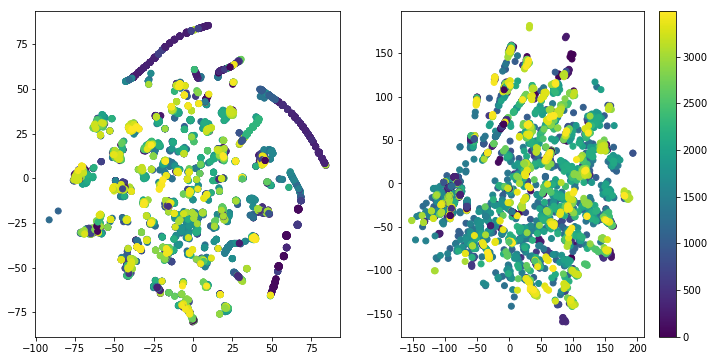

In [10]:
# 使用TSNE进行降维处理
tsne = TSNE(n_components=2, learning_rate=100).fit_transform(X)
# 使用PCA 进行降维处理
pca = PCA().fit_transform(X)
# 设置画布的大小
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=result_DBSCAN)
plt.subplot(122)
plt.scatter(pca[:, 0], pca[:, 1], c=result_DBSCAN)
plt.colorbar()
plt.show()

In [11]:
# GMM算法
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)

In [12]:
result_GMM = gmm.predict(X)

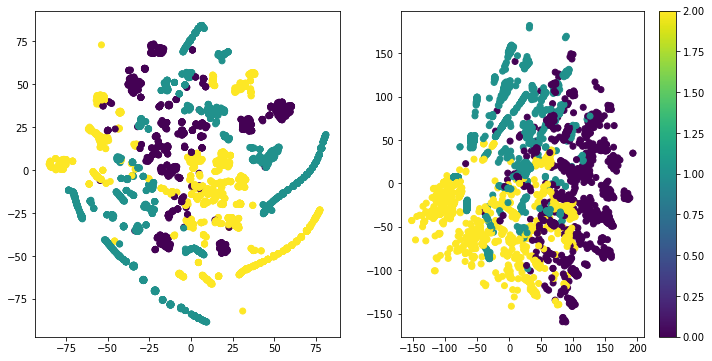

In [13]:
# 使用TSNE进行降维处理
tsne = TSNE(n_components=2, learning_rate=100).fit_transform(X)
# 使用PCA 进行降维处理
pca = PCA().fit_transform(X)
# 设置画布的大小
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=result_GMM)
plt.subplot(122)
plt.scatter(pca[:, 0], pca[:, 1], c=result_GMM)
plt.colorbar()
plt.show()

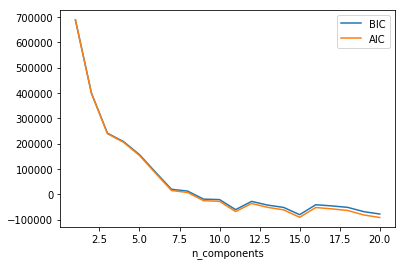

In [14]:
#作为一种生成模型，GMM提供了一种确定数据集最优成分数量的方法。
#由于生成模型本身就是数据集的概率分布，因此可以利用模型来评估数据的似然估计，并利用交叉检验防止过拟合。
#Scikit-Learn的GMM评估器内置了两种纠正过拟合的标准分析方法：赤池信息量准则（AIC）和贝叶斯信息准则（BIC）

import numpy as np
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [17]:
# 层次聚类算法
ac=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [18]:
result_Agg = ac.fit_predict(X)

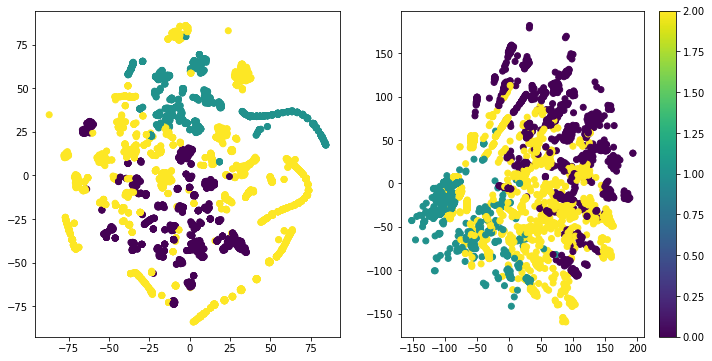

In [19]:
# 使用TSNE进行降维处理
tsne = TSNE(n_components=2, learning_rate=100).fit_transform(X)
# 使用PCA 进行降维处理
pca = PCA().fit_transform(X)
# 设置画布的大小
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=result_Agg)
plt.subplot(122)
plt.scatter(pca[:, 0], pca[:, 1], c=result_Agg)
plt.colorbar()
plt.show()

In [20]:
print ('cluster labels:%s'%result_Agg)

cluster labels:[0 0 0 ... 2 2 2]
